# 사이킷런으로 수행하는 타이타닉 생존자 예측

### 타이타닉 생존자 예측 모델
- 사용 데이터 세트 : 타이타닉 탑승자 데이터 세트  
- 데이터 세트 분리 : 학습용 데이터 세트 80%, 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘  
    - 의사결정 트리 DecisionTreeClassifier
    - 랜덤 포레스트 : RandomForestClassifier
    - 로지스틱 회귀(분류): LogisticRegression  
- 모델 평가 : 예측 성능 평가 - 정확도  

캐글에서 제공하는 타이타틱 탑승자 데이터 기반으로
생존자 예측을 사이킷런으로 수행

타이타닉 생존자 데이터
- 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
- 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
- 수행 방법을 캐글에 공유

캐글 : 데이터 분석 오픈 포탈  
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    

### 타이타닉 생존자 예측 프로세스  
---
- 데이터 정보 확인
    - (1) 데이터 세트 로드 및 확인 : 타이타닉 탑승자 데이터 세트 
- 데이터 가공
    - (2) 데이터 가공 (전처리)   
    - 생존자 파악  
- 생존자 예측 
    - (3) 데이터 세트 준비 : 피처 데이터 세트 / 레이블 데이터 세트  
        - 결정값 데이터 세트 만들기 
    - (4) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  
    - (5) 모델 학습 / 예측 / 평가   
        - 3개의 ML 알고리즘을 적용하여 모델 학습  
        - 생존자 예측   
        - 예측 정확도 평가  
            - 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가  

### (1) 데이터 세트 로드 및 확인 : 타이타닉 탑승자 데이터 세트

데이터 다운로드
https://www.kaggle.com/c/titanic/data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 정보 확인

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('../../data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Passengerid: 탑승자 데이터 일련번호
- Survived: 생존 여부, 0 = 사망, 1 = 생존
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- Sex: 탑승자 성별
- Name: 탑승자 이름
- Age: 탑승자 나이
- Sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- Parch: 같이 탑승한 부모님 또는 어린이 인원수
- Ticket: 티켓 번호
- Fare: 요금
- Ccabin: 선실 번호
- Embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# 데이터 확인 : 
# 데이터 타입 / Null 값 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터 정보 확인 결과
- RangeIndex: 891 entries, 0 to 890 : 전체 행 (891개 행)
- Data columns (total 12 columns): 칼럼 수 (12개)
- float64 : 2개
- int64 : 5개
- object(string) : 5개
 - (판다스는 넘파이 기반으로 만들어졌는데
 - 넘파이의 String 타입의 길이 제한이 있기 때문에 
 - 이에 대한 구분을 위해 object 타입으로 명기)
- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)

In [5]:
# Null 값 개수 확인
titanic_df['Age'].isnull().sum()
titanic_df['Cabin'].isnull().sum()
titanic_df['Embarked'].isnull().sum()

177

687

2

### (2) 데이터 가공 (전처리) 
- Null 값 처리  
- Cabin 값 조정  
- 생존자 파악 (성별 / 객실등급별 / 연령별)  
- 레이블 인코딩  
    - 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 모든 가공 내역을 함수로 작성  

Null 컬럼들에 대한 처리
- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
    - DataFrame의 fillna() 메서드를 사용해서
    - Null 값을 평균 또는 고정값으로 변경
    - Age : 평균 나이로 변경
    - 나머지 컬럼 : 'N'으로 변경

In [6]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 모든 컬럼의 Null 값을 합산해서 Null 값이 없는지 확인
titanic_df['Age'].isnull().sum()
titanic_df['Cabin'].isnull().sum()
titanic_df['Embarked'].isnull().sum()

0

0

0

In [7]:
# 문자열 피처(Sex, Cabin, Embarked) 값 분류 확인 : value_counts()
titanic_df['Sex'].value_counts()
titanic_df['Cabin'].value_counts()
titanic_df['Embarked'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [7]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 설명
# Sex,Embarked 값은 별 문제 없음
# Cabin 값 분포 중에서 'C23 C25 C27' : '선실등급+번호'로 표기
# - 선실 등급만(첫 번째 문자)만 추출 필요 : B C E ...

In [8]:
titanic_df['Cabin'].unique()

array(['N', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
# Cabin 열 값에서 첫 번째 문자만 추출
titanic_df['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [10]:
# Cabin 값을 선실등급만으로 표기 (선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [11]:
# Cabin 선실등급별 개수 확인
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### 생존자 파악 

머신러닝 알고리즘 적용해서 예측 수행하기 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별/부(객실 등급)/연령이 생존 확률에 어떤 영향을 미쳤는지 확인

#### 성별에 따른 생존여부 확인

In [13]:
# 성별 분포 확인
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
# 성별 생존 확인
# Survived
# 사망 : 0
# 생존 : 1
titanic_df[['Sex', 'Survived']].value_counts()
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
titanic_df.groupby(['Sex', 'Survived'])['Survived'].value_count() # 동일
# 여자 : 314명 중에서 233명 생존 (74.2% 생존)
# 남자 : 577명 중에서 109명 생존 (18.6% 생존)

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

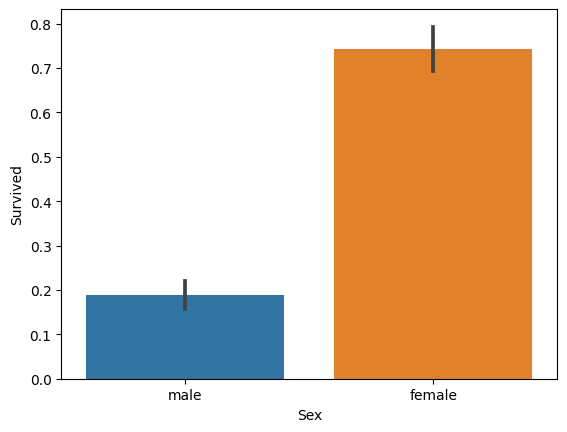

In [17]:
# 성별 생존자
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

In [21]:
# 연령이 12세 이하인 경우의 생존율 확인
titanic_df.loc[titanic_df['Age']<=12, 'Survived'].value_counts()
titanic_df.loc[titanic_df['Age']<=12, 'Survived'].value_counts(normalize=True)

Survived
1    40
0    29
Name: count, dtype: int64

Survived
1    0.57971
0    0.42029
Name: proportion, dtype: float64

In [ ]:
# 생존율
# 여성 : 74.2 %
# 남성 : 18.6 %
# 12세 이하 : 57.9 %

# 어린이, 여성, 남성 순으로 탈출

#### 객실 등급별/성별 생존여부 확인

<Axes: xlabel='Pclass', ylabel='Survived'>

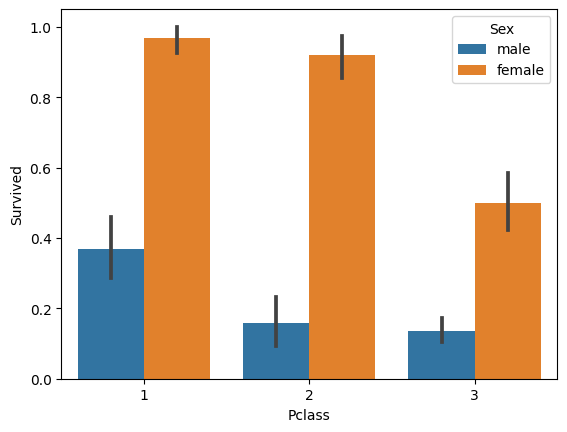

In [23]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 그래프 결과
# 여성 : 1등실, 2등실 생존률 차이는 크지 않지만
#        3등실의 경우 생존률이 상대적으로 많이 떨어짐
# 남성 : 2,3등실 보다 1등실이 생존률 월등히 높음
# 경제적으로 차이를 보이는 것을 관찰

#### 연령대별 생존여부 확인

In [24]:
titanic_df.Age.min()
titanic_df.Age.max()

0.42

80.0

In [26]:
# cut() 함수 사용해서 구간별로 나누고
bins = [0, 5, 12, 18, 25, 35, 60, 80]
labels = ['Baby', 'Child', 'Teenager', 'Young', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_ctg'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ctg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


<Axes: xlabel='Age_ctg', ylabel='Survived'>

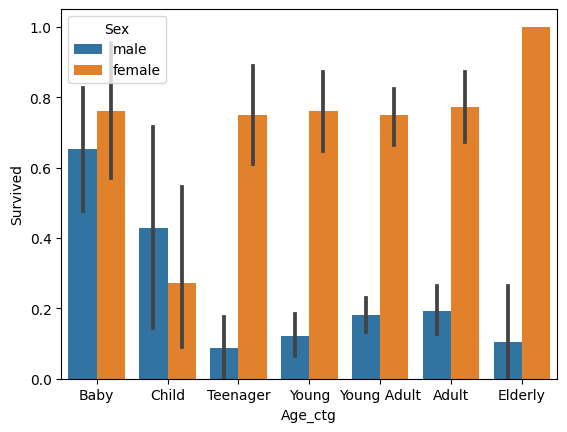

In [28]:
# 연령대별 생존자 확인
sns.barplot(x='Age_ctg', y='Survived', hue='Sex', data=titanic_df, order=labels)

# 그래프 결과
# Baby 생존률 높음
# 여자 Child 낮음
# Elderly : 여성 생존률이 월등히 높음

In [30]:
# Elderly 성별 비율 확인
titanic_df[titanic_df.Age_ctg=='Elderly'][['Sex', 'Survived']].value_counts()

# 총 22명
# 남성 사망 17, 생존 2
# 여성 생존만 3명

Sex     Survived
male    0           17
female  1            3
male    1            2
Name: count, dtype: int64

In [31]:
# 'Age_ctg' 컬럼 삭제
titanic_df.drop('Age_ctg', axis=1, inplace=True)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C


### 인코딩
- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 레이블 인코딩 수행 
- 트리 계열의 머신러닝 알고리즘은 숫자의 가중치 특성을 반영하지 않으므로
  - 레이블 인코딩 적용 시 문제 없음  

In [32]:
# 레이블 인코딩 적용할 피처 : Sex, Embarded, Cabin

In [34]:
# 사이킷런의 LabelEncoder 클래스를 이용해서 레이블 인코딩 적용
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩 변환 작업 수행하는 함수 작성
def encode_features(df_data):
    features = ['Cabin', 'Sex', 'Embarked']
    
    # 각 피처에 대해 반복 수행
    for f in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df_data[f])
        df_data[f] = encoder.transform(df_data[f])
    
    return df_data

titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [35]:
# 레이블 인코딩 결과 확인
titanic_df.Sex.unique()
titanic_df.Embarked.unique()
titanic_df.Cabin.unique()

array([1, 0])

array([3, 0, 2, 1])

array([7, 2, 4, 6, 3, 0, 1, 5, 8])

### 지금까지 가공한 내용을 정리하고 함수로 작성 (나중에 재사용 가능)

In [38]:
# 결측치 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    
    return df

# 필요 없는 열 제거 함수 
# 머신러닝 알고리즘에 적용할 때 불필요한 열 제거하는 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩수행 함수
def encode_features(df_data):
    df_data['Cabin'] = df_data['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    
    # 각 피처에 대해 반복 수행
    for f in features:
        encoder = LabelEncoder() 
        encoder = encoder.fit(df_data[f])
        df_data[f] = encoder.transform(df_data[f])
    
    return df_data

# 모든 함수들을 순서대로 한 번에 호출하기 위한 함수 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    
    return df

### (3) 데이터 세트 준비 : 피처 데이터 세트 / 레이블 데이터 세트

In [39]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('../../data/titanic_train.csv')

# 레이블 데이터 세트
labels = titanic_df['Survived']

# 피처 데이터 세트
feature_data = titanic_df.drop('Survived', axis=1)

# 데이터 전처리 함수 호출해서 전처리 수행
feature_data = transform_features(feature_data)
feature_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


### (4) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    labels,
                                                    test_size=0.2, 
                                                    random_state=11)

### (5) 모델 학습 / 예측 / 평가
- 3개의 ML 알고리즘을 적용하여 모델 학습  
    - 결정 트리 : DecisionTreeClassifier  
    - 랜덤 포레스트 : RandomForestClassifier  
    - 로지스틱 회귀(분류): LogisticRegression  
- 생존자 예측   
- 예측 정확도 평가  
	- 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가  

### 생존자 예측

3개의 ML 알고리즘 수행
- 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
- 3개의 알고리즘으로 예측 수행

사이킷런 클래스
- 결정 트리 : DecisionTreeClassifier 
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀(분류): LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
- 머신러닝 모델을 학습하고(fit()), 예측 수행(predict())
- 예측 성능평가 : 정확도 (accuracy_score() 사용)

### 예측 프로세스에 사용하는 ML 알고리즘

결정 트리 알고리즘
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내
- 트리 기반의 분류 규칙을 만드는 알고리즘

랜덤 포레스트 알고리즘
- 대표적인 앙상블 알고리즘
- 같은 알고리즘으로 여러 개의 분류기를 만들어서
- 보팅으로 최종 결정하는 알고리즘
    - 보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식  

로지스틱 회귀 알고리즘
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행
    -  시그모이드 함수 : S자 커브 형태  

앙상블 학습 (Ensemble Learning)
- 여러 개의 분류기를 사용해서 예측 결합함으로써  
- 보다 정확한 최종 예측을 도출하는 기법  

In [41]:
# 3개의 알고리즘을 사용해서 학습/예측/평가 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)
# max_iter=1000 : 알고리즘 학습을 반복 수행하는데
# 무한 반복되지 않도록 계산하여 해를 찾는 방법 횟수를 지정

In [45]:
# 모델/예측/평가 학습

# (1) DecisionTreeClassifier 
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred_dt)))
# DecisionTreeClassifier 정확도 : 0.7877

# (2) RandomForestClassifier 
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
# ecisionTreeClassifier 정확도 : 0.8547

# (3) LogisticRegression 
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred_lr)))
# DecisionTreeClassifier 정확도 : 0.8492

# 결과
# 3개의 머신러닝 알고리즘을 적용하여 모델 3개 생성해서
# 학습/평가/예측한 결과
# 랜덤 포레스트 알고리즘을 사용한 경우 예측 정확도가 가장 높게 나왔음

DecisionTreeClassifier(random_state=11)

DecisionTreeClassifier 정확도 : 0.7877


RandomForestClassifier(random_state=11)

DecisionTreeClassifier 정확도 : 0.8547


LogisticRegression(max_iter=1000)

DecisionTreeClassifier 정확도 : 0.8492
